In [1]:
from typing import Callable

import torch
import numpy
import matplotlib.pyplot as plt

from utilities import CostParameters, least_square_cost, ridge_cost

In [2]:
torch.set_default_dtype(torch.float64)
if torch.cuda.is_available():
    torch.set_default_device("cuda")

In [3]:
TEST_DATA_SIZE = 100
X = numpy.sort(numpy.random.rand(TEST_DATA_SIZE, 1), axis=0)
Y = numpy.random.rand(TEST_DATA_SIZE, 1)

In [4]:
input_layer = 1
output_layer = 1
learning_rate = 1e-5

def train(hidden_layer: int, epochs: int, cost_func: Callable[[CostParameters], torch.Tensor], print_debug_info: bool = False) -> None:
    x_tensor = torch.tensor(X)
    y_tensor = torch.tensor(Y)

    weights_layer1 = torch.rand(input_layer, hidden_layer, requires_grad=True)
    biases_layer1 = torch.rand(hidden_layer, requires_grad=True)
    weights_layer2 = torch.rand(hidden_layer, output_layer, requires_grad=True)
    biases_layer2 = torch.rand(output_layer, requires_grad=True)

    def predict() -> torch.Tensor:
        return (x_tensor @ weights_layer1 + biases_layer1) @ weights_layer2 + biases_layer2

    for i in range(epochs):
        predicted = predict()

        cost_params = CostParameters(y_tensor, predicted, [weights_layer1, weights_layer2], [biases_layer1, biases_layer2])
        loss = cost_func(cost_params)

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 500 == 0:
                print(f"Info at epoch #{iteration_id}:")
                print(f"Loss: {loss.item()}")

        loss.backward()

        with torch.no_grad():
            weights_layer1 -= learning_rate * weights_layer1.grad
            biases_layer1 -= learning_rate * biases_layer1.grad
            weights_layer2 -= learning_rate * weights_layer2.grad
            biases_layer2 -= learning_rate * biases_layer2.grad

            weights_layer1.grad = None
            biases_layer1.grad = None
            weights_layer2.grad = None
            biases_layer2.grad = None

    final_prediction = numpy.array(predict().detach().cpu())

    plt.title(f"Training a 2D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")
    plt.scatter(X, Y)
    plt.plot(X, final_prediction)
    plt.show()

Info at epoch #500:
Loss: 8.816148810448382
Info at epoch #1000:
Loss: 8.316770566522546
Info at epoch #1500:
Loss: 8.300048573961085
Info at epoch #2000:
Loss: 8.299337006013719
Info at epoch #2500:
Loss: 8.299160314587711
Info at epoch #3000:
Loss: 8.299002342705247
Info at epoch #3500:
Loss: 8.298845842589518
Info at epoch #4000:
Loss: 8.298690220553269
Info at epoch #4500:
Loss: 8.298535439092522
Info at epoch #5000:
Loss: 8.298381479513779


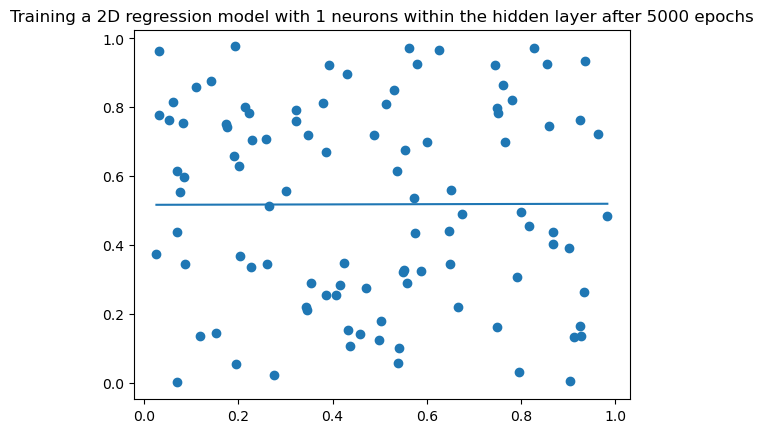

Info at epoch #500:
Loss: 18.91898340776404
Info at epoch #1000:
Loss: 14.117340194000068
Info at epoch #1500:
Loss: 11.544472219223326
Info at epoch #2000:
Loss: 10.118693858896489
Info at epoch #2500:
Loss: 9.314902383073125
Info at epoch #3000:
Loss: 8.85795705888843
Info at epoch #3500:
Loss: 8.597228249546356
Info at epoch #4000:
Loss: 8.448266151037217
Info at epoch #4500:
Loss: 8.36314930313926
Info at epoch #5000:
Loss: 8.314532893510714


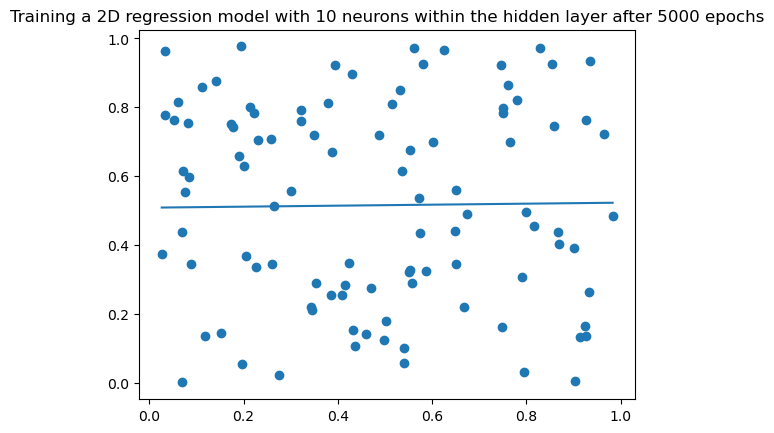

Info at epoch #500:
Loss: 12.95401049392959
Info at epoch #1000:
Loss: 8.445814931576137
Info at epoch #1500:
Loss: 8.258108785044598
Info at epoch #2000:
Loss: 8.250305775404073
Info at epoch #2500:
Loss: 8.249981627230445
Info at epoch #3000:
Loss: 8.249968163769434
Info at epoch #3500:
Loss: 8.249967604584251
Info at epoch #4000:
Loss: 8.24996758135946
Info at epoch #4500:
Loss: 8.249967580394864
Info at epoch #5000:
Loss: 8.249967580354802


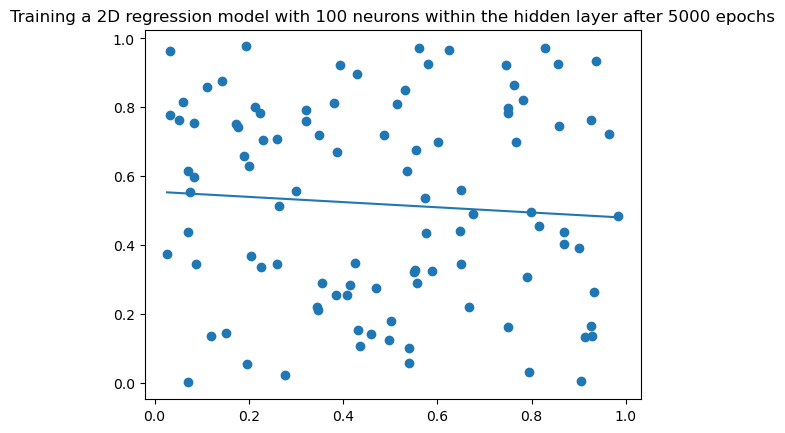

In [5]:
train(1, 5_000, least_square_cost, print_debug_info=True)
train(10, 5_000, least_square_cost, print_debug_info=True)
train(100, 5_000, least_square_cost, print_debug_info=True)


Info at epoch #500:
Loss: 8.513700068181477
Info at epoch #1000:
Loss: 8.476868415143365
Info at epoch #1500:
Loss: 8.471025904094535
Info at epoch #2000:
Loss: 8.46682782537376
Info at epoch #2500:
Loss: 8.462774155591786
Info at epoch #3000:
Loss: 8.458786097321275
Info at epoch #3500:
Loss: 8.454857740804629
Info at epoch #4000:
Loss: 8.450986951932176
Info at epoch #4500:
Loss: 8.447171856082559
Info at epoch #5000:
Loss: 8.44341066548179


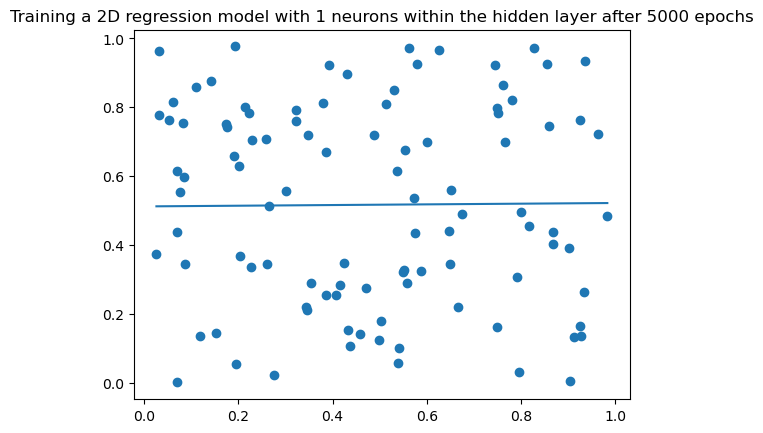

Info at epoch #500:
Loss: 13.398830862758778
Info at epoch #1000:
Loss: 12.259531595067497
Info at epoch #1500:
Loss: 11.468228788718749
Info at epoch #2000:
Loss: 10.907677917935434
Info at epoch #2500:
Loss: 10.504941802897928
Info at epoch #3000:
Loss: 10.212515268192107
Info at epoch #3500:
Loss: 9.998451433997094
Info at epoch #4000:
Loss: 9.840728786595708
Info at epoch #4500:
Loss: 9.72387775724801
Info at epoch #5000:
Loss: 9.636874266528894


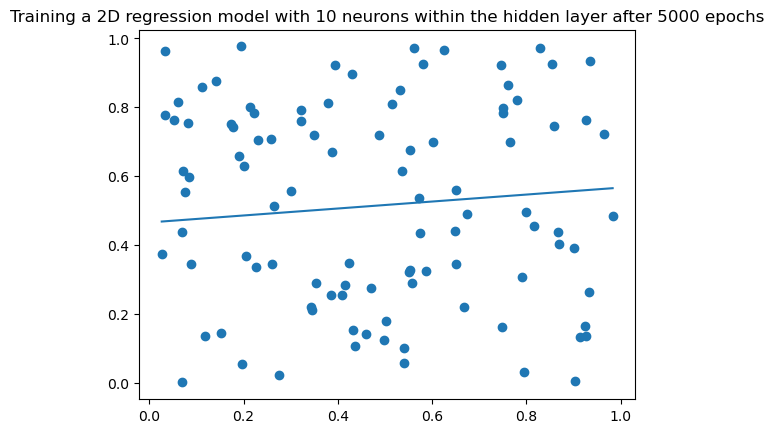

Info at epoch #500:
Loss: 16.586729846473574
Info at epoch #1000:
Loss: 12.828246597472111
Info at epoch #1500:
Loss: 12.726099717374852
Info at epoch #2000:
Loss: 12.720943355464804
Info at epoch #2500:
Loss: 12.718372323503054
Info at epoch #3000:
Loss: 12.715870469811504
Info at epoch #3500:
Loss: 12.713370474382344
Info at epoch #4000:
Loss: 12.71087052916197
Info at epoch #4500:
Loss: 12.708370585418677
Info at epoch #5000:
Loss: 12.705870641837063


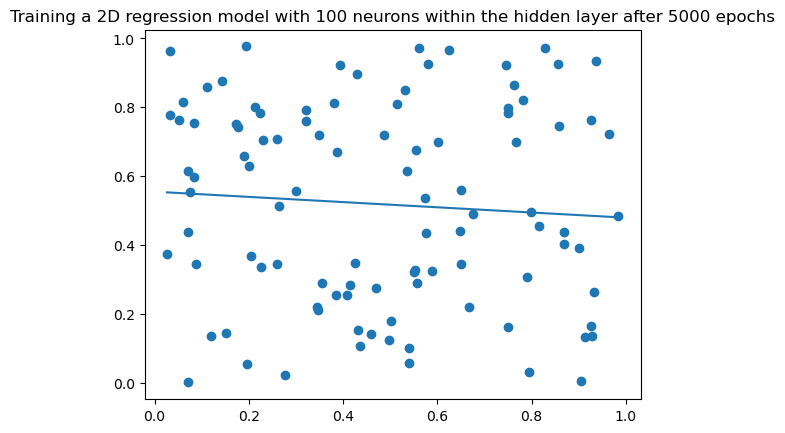

In [6]:
train(1, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)
train(10, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)
train(100, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)